In [ ]:
# Important library imports
import cv2
import numpy as np
import requests
from PIL import Image

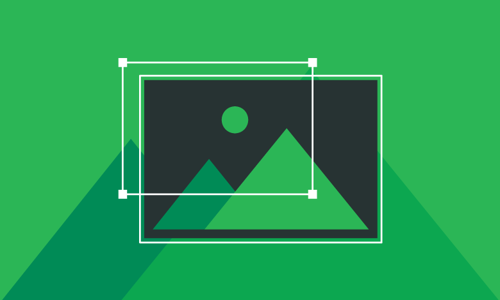

In [ ]:
# Reading image form url
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png', stream=True).raw)
image_logo = image.resize((500,300))
image_text = image.resize((500,300))
image_logo

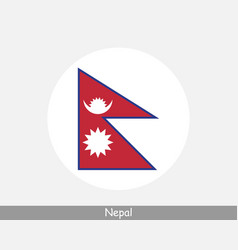

In [ ]:
# Reading logo form url
logo = Image.open(requests.get('https://cdn1.vectorstock.com/i/thumb-large/11/65/nepal-round-circle-flag-vector-38611165.jpg', stream=True).raw)
logo

In [ ]:
image_logo = np.array(image_logo.convert('RGB'))
h_image, w_image, _ = image_logo.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

In [ ]:
# Get the center of the original. It's the location where we will place the watermark
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

In [ ]:
# Get ROI
roi = image_logo[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 1, logo, 1, 0)
# Drawing
cv2.line(image_logo, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logo, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Replace the ROI on the image
image_logo[top_y: bottom_y, left_x: right_x] = result

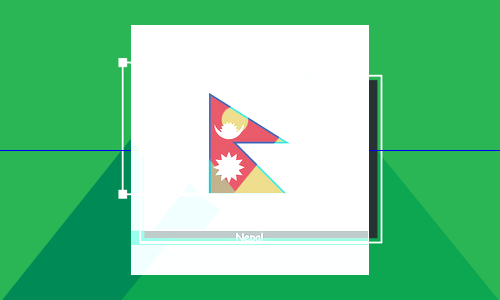

In [ ]:
# Ploting logo watermark image
img = Image.fromarray(image_logo, 'RGB')
img

In [ ]:
# Text Watermark
image_text = np.array(image_text.convert('RGB'))
cv2.putText(image_text, text='Nepal', org=(w_image - 95, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(0,0,255), thickness=2, lineType=cv2.LINE_4); 

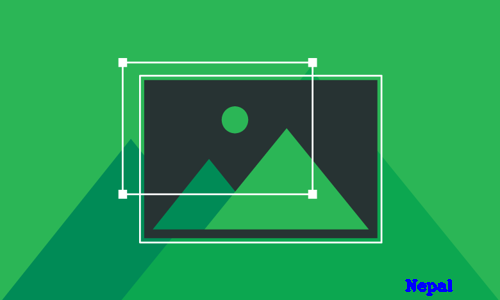

In [ ]:
# Plotting text watermark image
text_img = Image.fromarray(image_text, 'RGB')
text_img